# Demo for Multiphase Monte Carlo in hopsy

Multiphase Monte Carlo works well for some uniform sampling problems. Here is a short demo on how to use it from hopsy.
In contrast to the BenchmarkingMultiphaseMonteCarloSampling.ipynb, which writes a custom implementation of the algorithm to demonstrate hopsys flexibility, this notebook uses the preimplemented variant in hopsy.

For everyday sampling this preimplemented variant is convenient.
Reference: https://drops.dagstuhl.de/opus/volltexte/2021/13820/pdf/LIPIcs-SoCG-2021-21.pdf

In [1]:
import hopsy
import numpy as np
from matplotlib import pyplot as plt

## define problem and run sampling

In [2]:
bp = hopsy.BirkhoffPolytope(5)
problem =  hopsy.Problem(bp.A, bp.b)
# gurobi can find the chebyshev center at 0, but glpk can not. For CI, the start is hardcoded, because we don't have gurobi licenses on CI servers
start = np.zeros(problem.A.shape[1])
seeds = [42, 43, 44, 45]
samples, iterations, ess, runtime = hopsy.run_multiphase_sampling(problem=problem, seeds=seeds, steps_per_phase=100, starting_points=[start for s in seeds], n_procs=len(seeds))

## visualize samples 

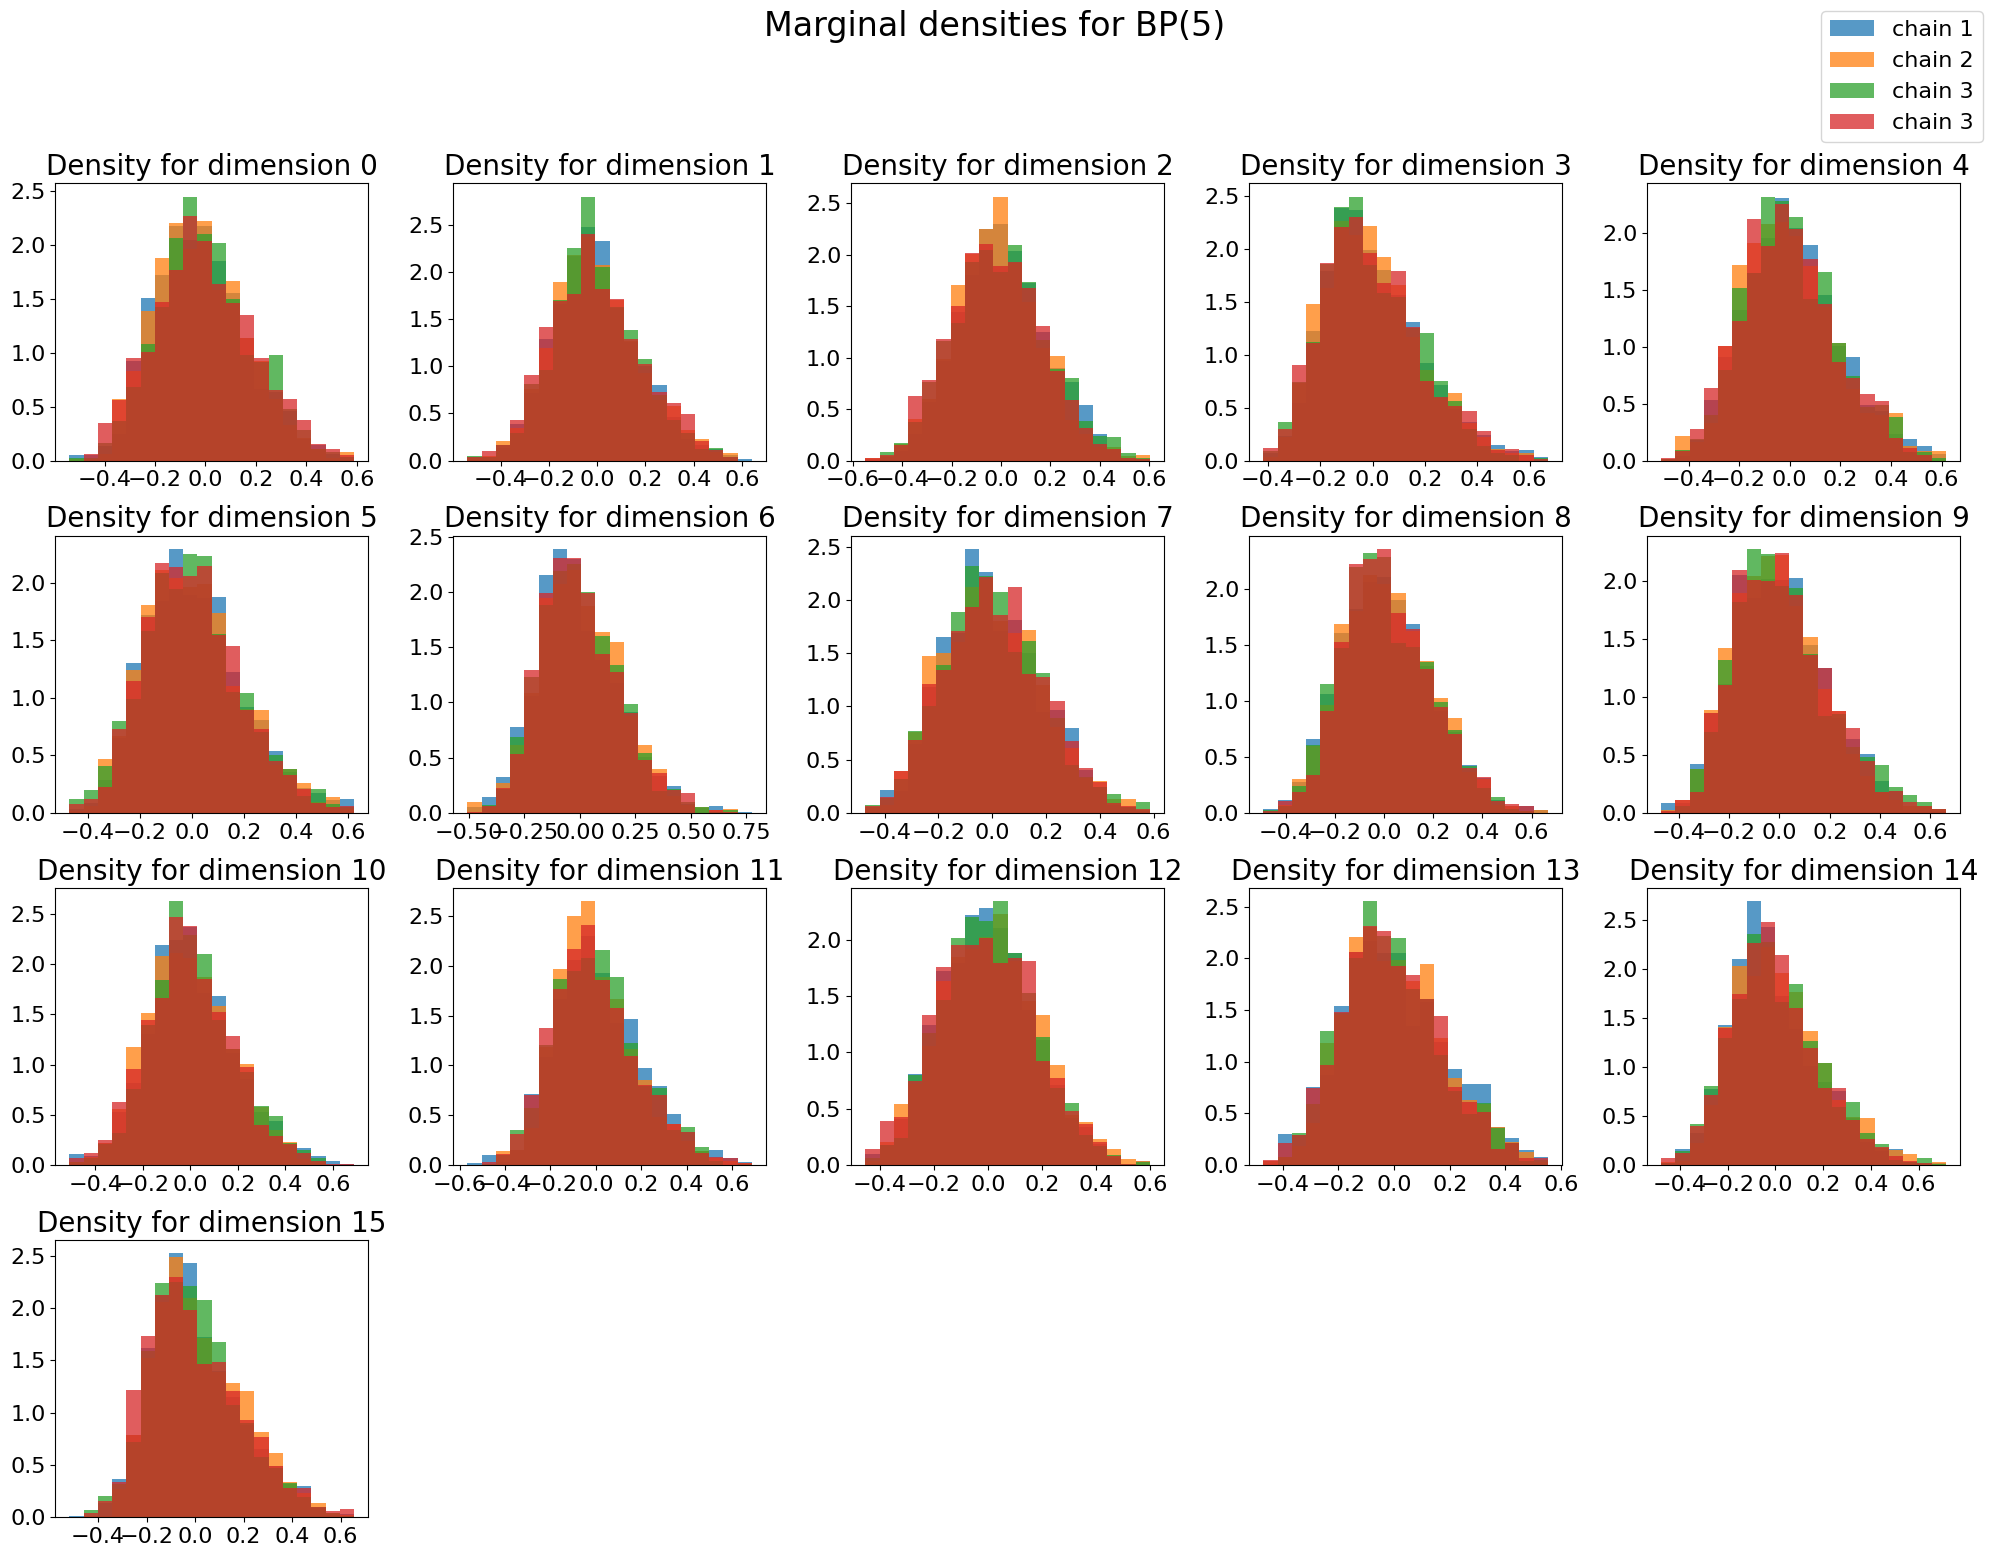

In [3]:
## visualization settings
title_fs = 24
label_fs = 16
tick_fs = 16
legend_fs = 16
img_format = "pdf"
##


n_dims = samples.shape[2]
n_cols = 5
n_rows = int(n_dims / n_cols) + 1

plt.figure(figsize=(n_cols * 4, n_rows * 4))
plt.subplot(n_rows, n_cols, 1)
plt.suptitle(
    "Marginal densities for BP(5)", y=1.0, fontsize=title_fs
)

for dim in range(n_dims):
    plt.subplot(n_rows, n_cols, dim + 1)
    plt.title(f"Density for dimension {dim}", fontsize=title_fs - 4)
    _, bins, _ = plt.hist(
        samples[0,:, dim],
        bins=20,
        density=True,
        label="chain 1" if dim == 0 else None,
        alpha=0.75,
    )
    plt.hist(
        samples[1,:, dim],
        bins=bins,
        density=True,
        label="chain 2" if dim == 0 else None,
        alpha=0.75,
    )
    plt.hist(
        samples[2,:, dim],
        bins=bins,
        density=True,
        label="chain 3" if dim == 0 else None,
        alpha=0.75,
    )
    plt.hist(
        samples[3,:, dim],
        bins=bins,
        density=True,
        label="chain 3" if dim == 0 else None,
        alpha=0.75,
    )
    plt.xticks(fontsize=tick_fs)
    plt.yticks(fontsize=tick_fs)

plt.figlegend(fontsize=legend_fs)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()